In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset

df = pd.read_csv('C:/Users/xpert/Documents/Stock Prices Data Set.csv')
print(df.head())

  symbol      date      open      high       low     close    volume
0    AAL  02-01-14   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  02-01-14   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  02-01-14  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  02-01-14   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  02-01-14   70.1100   70.2300   69.4800   69.8900   1148391


In [3]:
# Check info

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None


In [4]:
# Check missing values

print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64


In [5]:
# Handle missing values using imputation

df[['open','high','low']] = df[['open','high','low']].ffill()
df[['open','high','low']] = df[['open','high','low']].bfill()

# Verify cleaning
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [6]:
# Check duplicate rows

print(df.duplicated().sum())
print(df[df.duplicated()])

0
Empty DataFrame
Columns: [symbol, date, open, high, low, close, volume]
Index: []


In [7]:
# General statistics

print("Summary statistics:\n", df.describe())

Summary statistics:
                 open           high            low          close  \
count  497472.000000  497472.000000  497472.000000  497472.000000   
mean       86.351835      87.131986      85.551898      86.369082   
std       101.470449     102.311361     100.570269     101.472407   
min         1.620000       1.690000       1.500000       1.590000   
25%        41.690000      42.090000      41.280000      41.703750   
50%        64.970000      65.560000      64.350000      64.980000   
75%        98.410000      99.230000      97.580000      98.420000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  4.974720e+05  
mean   4.253611e+06  
std    8.232139e+06  
min    0.000000e+00  
25%    1.080166e+06  
50%    2.084896e+06  
75%    4.271928e+06  
max    6.182376e+08  


In [8]:
# Mean

print("\nMean values:\n", df.mean(numeric_only=True))


Mean values:
 open      8.635183e+01
high      8.713199e+01
low       8.555190e+01
close     8.636908e+01
volume    4.253611e+06
dtype: float64


In [9]:
# Median

print("\nMedian values:\n", df.median(numeric_only=True))


Median values:
 open           64.97
high           65.56
low            64.35
close          64.98
volume    2084896.50
dtype: float64


In [10]:
# Mode

print("\nMode values:\n", df.mode().iloc[0])


Mode values:
 symbol            A
date       05-12-17
open           70.0
high           72.0
low            77.0
close          34.5
volume    1241019.0
Name: 0, dtype: object


In [11]:
# Standard deviation

print("\nStandard Deviation:\n", df.std(numeric_only=True))


Standard Deviation:
 open      1.014704e+02
high      1.023114e+02
low       1.005703e+02
close     1.014724e+02
volume    8.232139e+06
dtype: float64


Visualizing data distributions

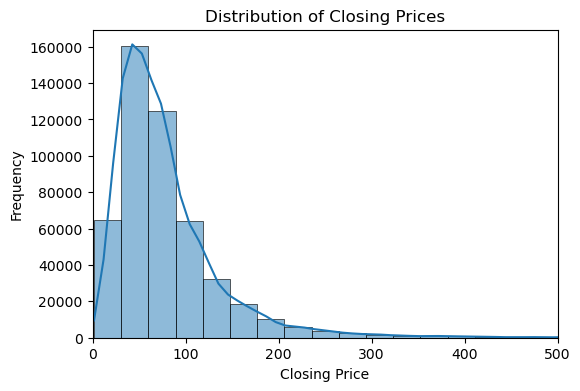

In [12]:
# Histogram of Closing Prices

plt.figure(figsize=(6,4))
sns.histplot(df['close'], bins=70, kde=True)
plt.xlim(0, 500)
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.show()

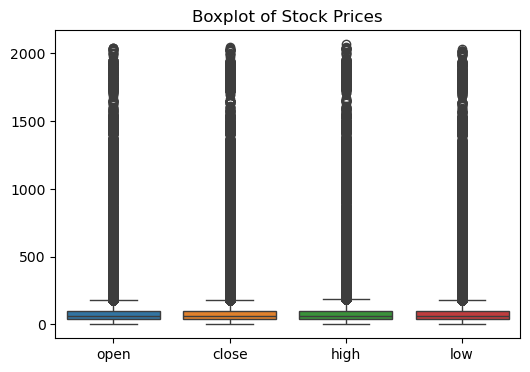

In [13]:
# Boxplot for Stock Prices

plt.figure(figsize=(6,4))
sns.boxplot(df[['open','close','high','low']])
plt.title("Boxplot of Stock Prices")
plt.show()

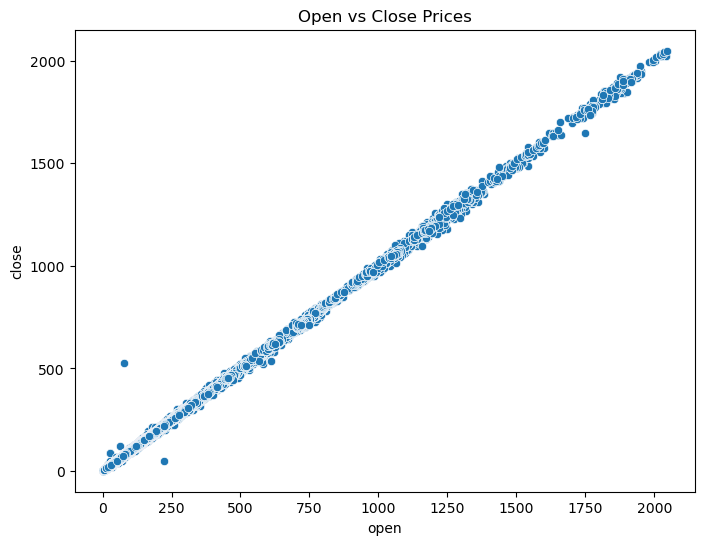

In [14]:
# Scatter plot: Open vs Close

plt.figure(figsize=(8,6))
sns.scatterplot(x="open", y="close", data=df)
plt.title("Open vs Close Prices")
plt.show()

In [15]:
# Correlation Matrix

corr = df.corr(numeric_only=True)
corr

,open,high,low,close,volume
open,1.000000,0.999937,0.999924,0.999852,-0.148721
high,0.999937,1.000000,0.999905,0.999917,-0.148341
low,0.999924,0.999905,1.000000,0.999921,-0.149281
close,0.999852,0.999917,0.999921,1.000000,-0.148839
volume,-0.148721,-0.148341,-0.149281,-0.148839,1.000000


In [16]:
# Save the file

df.to_csv("Stock Prices Data Set.csv", index=False)